In [1]:
import pandas as pd
import numpy as np

In [2]:
#pd.show_versions()

In [3]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html
aa_exam_exam_result = ['pass', 'fail']
aa_exam_sex = ['m', 'f']
aa_exam_rank = ['Kyu', 'Dan']
aa_exam_dojo = ['Shizuka Karate', 'Zen Karate Club', 'DAN Karate', 'Little Dragon Karate']
# Age is between 6 and 90
age = np.arange(6,90)
# number of sample exams
numberexams = 10

In [4]:
# generate random characters
#pd.util.testing.rands(5)
#pd.util.testing.rands_array(3,10)
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html
# Generate a non-uniform random array e.g. to use for the random Age generation

# age.size -> 84
os = np.ones((age.size, 1), dtype=np.int)#.transpose())
#print(os)
nuage = np.random.dirichlet(np.ravel(os), 1).transpose()
#print(nuage)
agep = np.ravel(nuage)
#print(agep)

In [5]:
# to preserve order of columns define each separte
examid = np.arange(1,numberexams+1)
sex = np.random.choice(aa_exam_sex, numberexams, p=[0.6,0.4])
age = np.random.choice(age, numberexams,  p=agep)
karaterank = np.random.choice(aa_exam_rank, numberexams, p=[0.7,0.3])
dojo = np.random.choice(aa_exam_dojo, numberexams)
grade = np.random.randint(1,9, size=numberexams)
yearsexperience = np.random.randint(0,40, size=numberexams)
examresult = np.random.choice(aa_exam_exam_result, numberexams, p=[0.8,0.2])

pd_karate_exams = pd.DataFrame.from_items([('ExamId', examid), ('Sex', sex),\
                                           ('Age', age), ('Rank',karaterank),('Grade',grade),\
                                           ('YearsExperience',yearsexperience),('Dojo',dojo),\
                                           ('ExamResult',examresult)])

# distribution of values
#pd_karate_exams ['Age'].value_counts()
#pd_karate_exams ['ExamResult'].value_counts()

In [6]:
#https://en.wikipedia.org/wiki/Shodan_(rank)
#https://stackoverflow.com/questions/24790676/how-to-write-a-lambda-function-that-is-conditional-on-two-variables-columns-in
#https://stackoverflow.com/questions/36603018/pandas-multiple-conditions-based-on-multiple-columns-using-np-where
#https://stackoverflow.com/questions/21702342/creating-a-new-column-based-on-if-elif-else-condition
# shodan at least 18 years old
def shodan(row):
    if (row.Rank == 'Dan') and (row.Grade == 1) :
        return np.random.randint(18,90)
    else:
        return row.Age

pd_karate_exams['Age'] = pd_karate_exams.apply(shodan, axis = 1)

In [7]:
#https://en.wikipedia.org/wiki/Dan_(rank)
# nidan to yondan at least 30 years old
def nitoyondan(row):
    if (row.Rank == 'Dan') and (row.Grade >= 2 & row.Grade <=4) :
        return np.random.randint(30,90)
    else:
        return row.Age

pd_karate_exams['Age'] = pd_karate_exams.apply(nitoyondan, axis = 1)

In [8]:
#https://en.wikipedia.org/wiki/Dan_(rank)
# godan to yondan at least 45 years old
def godan(row):
    if (row.Rank == 'Dan') and (row.Grade >= 5) :
        return np.random.randint(45,90)
    else:
        return row.Age

pd_karate_exams['Age'] = pd_karate_exams.apply(godan, axis = 1)

In [9]:
def yearsexperience(row):
    if (row.Rank == 'Kyu'):
        if (row.Grade >= 7 and row.Grade <= 9):
            return np.random.randint(0,2)
        elif (row.Grade >= 4 and row.Grade <=6):
            return np.random.randint(2,4)
        else:
            return np.random.randint(5,10)
    else:
        return np.random.randint(10,40)
pd_karate_exams['YearsExperience'] = pd_karate_exams.apply(yearsexperience, axis = 1)    

In [10]:
pd_karate_exams.sort_values(['Rank','Dojo','Age'],inplace=True,ascending=False)
pd_karate_exams.head(10)
#pd_karate_exams.info()

ExamId Sex  Age Rank  Grade  YearsExperience                  Dojo  \
4       5   f   46  Kyu      8                1       Zen Karate Club   
3       4   f   10  Kyu      3                9       Zen Karate Club   
6       7   m   36  Kyu      5                2        Shizuka Karate   
8       9   m   32  Kyu      8                1        Shizuka Karate   
1       2   m   58  Kyu      5                2  Little Dragon Karate   
7       8   m   73  Kyu      8                0            DAN Karate   
2       3   f   80  Dan      1               27            DAN Karate   
5       6   f   80  Dan      1               23            DAN Karate   
9      10   m   79  Dan      1               17            DAN Karate   
0       1   m   65  Dan      6               36            DAN Karate   

  ExamResult  
4       pass  
3       fail  
6       pass  
8       pass  
1       fail  
7       pass  
2       pass  
5       pass  
9       fail  
0       pass

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


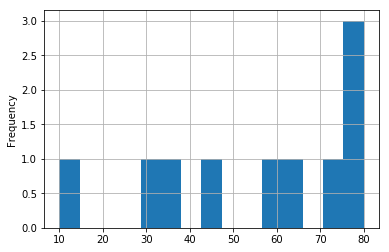

In [11]:
# https://pandas.pydata.org/pandas-docs/stable/visualization.html
from pandas.plotting import scatter_matrix
# Loads Numpy and matplotlib for interactive use
%pylab
# Shows matplotlib objects inline
%matplotlib inline
#pd_karate_exams.plot(kind='line')
pd_karate_exams.Age.plot.hist(bins=15,grid=True) #kde,hist,box,line,bar
#pd_karate_exams.plot.scatter(x='Grade',y='Age',color='Green')
#pd_karate_exams.plot.hexbin(x='Grade',y='Age',gridsize=15)
#pd_karate_exams.std().plot.bar()
#scatter_matrix(pd_karate_exams, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [17]:
pd_karate_exams.to_csv(path_or_buf='/home/dslinuxalex/karate_exams.csv',sep=',',header=True,\
                       index=False,index_label=None)

In [13]:
#grouped=pd_karate_exams.groupby(['Sex','Rank'])
#grouped.sum()

# 